# Feels Protocol Baseline Analysis

This notebook provides exploratory analysis of the Feels protocol using current default parameters.
It demonstrates the core simulation capabilities and provides baseline metrics for comparison
with parameter optimization scenarios.

## Objectives

1. Run baseline simulation with current protocol defaults (98.5% buffer, 1% treasury, 0.5% creator)
2. Analyze floor price dynamics and POMM deployment patterns
3. Examine fee distribution and accumulation patterns
4. Visualize key metrics and establish baseline performance
5. Compare different fee scenarios to understand parameter sensitivity

In [1]:
# Import required libraries
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

# Setup path handling for both local and online execution
try:
    # Try importing the package directly (works when installed via pip)
    from feels_sim.config import SimulationConfig
    from feels_sim.core import FeelsSimulation
    from feels_sim.metrics import (
        calculate_key_metrics, 
        calculate_hourly_aggregates,
        calculate_floor_to_market_ratio_stats,
        calculate_pomm_efficiency_metrics,
        snapshots_to_dataframe
    )
    # Import centralized plotting functions
    from feels_sim.plotting import (
        setup_plot_style, create_summary_plots, create_detailed_analysis_plots,
        PlotStyle, DEFAULT_STYLE, plot_price_evolution, plot_volume_analysis,
        create_figure_with_style, save_plot
    )
    print("Package imported successfully")
    
except ImportError:
    # Fallback for local development - add project root to path
    print("Package not installed, using local development setup...")
    project_root = Path().cwd().parent
    sys.path.insert(0, str(project_root))
    
    try:
        from feels_sim.config import SimulationConfig
        from feels_sim.core import FeelsSimulation
        from feels_sim.metrics import (
            calculate_key_metrics, 
            calculate_hourly_aggregates,
            calculate_floor_to_market_ratio_stats,
            calculate_pomm_efficiency_metrics,
            snapshots_to_dataframe
        )
        # Import centralized plotting functions
        from feels_sim.plotting import (
            setup_plot_style, create_summary_plots, create_detailed_analysis_plots,
            PlotStyle, DEFAULT_STYLE, plot_price_evolution, plot_volume_analysis,
            create_figure_with_style, save_plot
        )
        print("Local development imports successful")
    except ImportError as e:
        print(f"Import failed: {e}")
        print("Please ensure feels_sim package is installed or you're running from the project directory")
        raise

# Setup centralized plotting style
setup_plot_style()
print("Centralized plotting style configured")

print("Libraries imported successfully with centralized styling")

Package not installed, using local development setup...


Local development imports successful
Centralized plotting style configured
Libraries imported successfully with centralized styling


## 1. Baseline Simulation with Current Defaults

In [2]:
# Run baseline simulation with current protocol defaults
print("Running baseline simulation (168 hours)...")

config = SimulationConfig()  # Uses current defaults: protocol=100bps, creator=50bps, buffer gets remainder
print(f"Fee split: protocol={config.protocol_fee_rate_bps}bps, creator={config.creator_fee_rate_bps}bps, buffer gets remainder")

sim = FeelsSimulation(config)
baseline_results = sim.run(hours=168)  # 1 week

print(f"Simulation completed: {len(baseline_results.snapshots)} snapshots, {len(baseline_results.hourly_aggregates)} hourly aggregates")

Running baseline simulation (168 hours)...
Fee split: protocol=100bps, creator=50bps, buffer gets remainder


Simulation completed: 10080 snapshots, 168 hourly aggregates


In [3]:
# Analyze baseline results
baseline_analysis = calculate_key_metrics(baseline_results.snapshots)

print("=== BASELINE SIMULATION RESULTS ===")
print(f"Simulation Duration: {baseline_analysis['simulation_hours']:.1f} hours")
print(f"Initial SOL Price: ${baseline_analysis['initial_sol_price']:.2f}")
print(f"Final SOL Price: ${baseline_analysis['final_sol_price']:.2f}")
print(f"Initial Floor Price: ${baseline_analysis['initial_floor_price']:.6f}")
print(f"Final Floor Price: ${baseline_analysis['final_floor_price']:.6f}")
print(f"")
print(f"Floor Growth Rate (Annual): {baseline_analysis['floor_growth_rate_annual']:.2%}")
print(f"Average Floor/Market Ratio: {baseline_analysis['avg_floor_to_market_ratio']:.2%}")
print(f"Total POMM Deployments: {baseline_analysis['pomm_deployments']}")
print(f"Total Trading Volume: {baseline_analysis['total_volume']:,.0f} FeelsSOL")
print(f"Total Fees Collected: {baseline_analysis['total_fees']:,.2f} FeelsSOL")
print(f"Protocol Efficiency: {baseline_analysis['protocol_efficiency']:.6f} USD/FeelsSOL")
print(f"")
print(f"Final Treasury Balance: {baseline_analysis['final_treasury_balance']:,.2f} FeelsSOL")
print(f"Final Buffer Balance: {baseline_analysis['final_buffer_balance']:,.2f} FeelsSOL")
print(f"Final Deployed FeelsSOL: {baseline_analysis['final_deployed_feelssol']:,.2f} FeelsSOL")
print(f"Buffer Routed (Cumulative): {baseline_analysis['buffer_routed_cumulative']:,.2f} FeelsSOL")
print(f"Mint Cumulative: {baseline_analysis['mint_cumulative']:,.2f} FeelsSOL")

=== BASELINE SIMULATION RESULTS ===
Simulation Duration: 168.0 hours
Initial SOL Price: $100.00
Final SOL Price: $100.03
Initial Floor Price: $0.000100
Final Floor Price: $0.135825

Floor Growth Rate (Annual): 135724.99%
Average Floor/Market Ratio: 0.07%
Total POMM Deployments: 2801
Total Trading Volume: 7,124,242 FeelsSOL
Total Fees Collected: 21,372.73 FeelsSOL
Protocol Efficiency: 0.000006 USD/FeelsSOL

Final Treasury Balance: 213.73 FeelsSOL
Final Buffer Balance: 0.73 FeelsSOL
Final Deployed FeelsSOL: 1,357,849.65 FeelsSOL
Buffer Routed (Cumulative): 21,052.13 FeelsSOL
Mint Cumulative: 1,341,546.89 FeelsSOL


## 2. Visualizations and Pattern Analysis

In [4]:
# Create comprehensive visualizations using centralized plotting functions
print("Creating summary plots...")
create_summary_plots(baseline_results)
plt.show()

print("\nCreating detailed analysis plots...")
create_detailed_analysis_plots(baseline_results)
plt.show()

Creating summary plots...


Plot saved to experiments/outputs/plots/simulation_summary_20251017_134848.png

Creating detailed analysis plots...


Plot saved to experiments/outputs/plots/simulation_detailed_20251017_134853.png


Creating price evolution analysis...


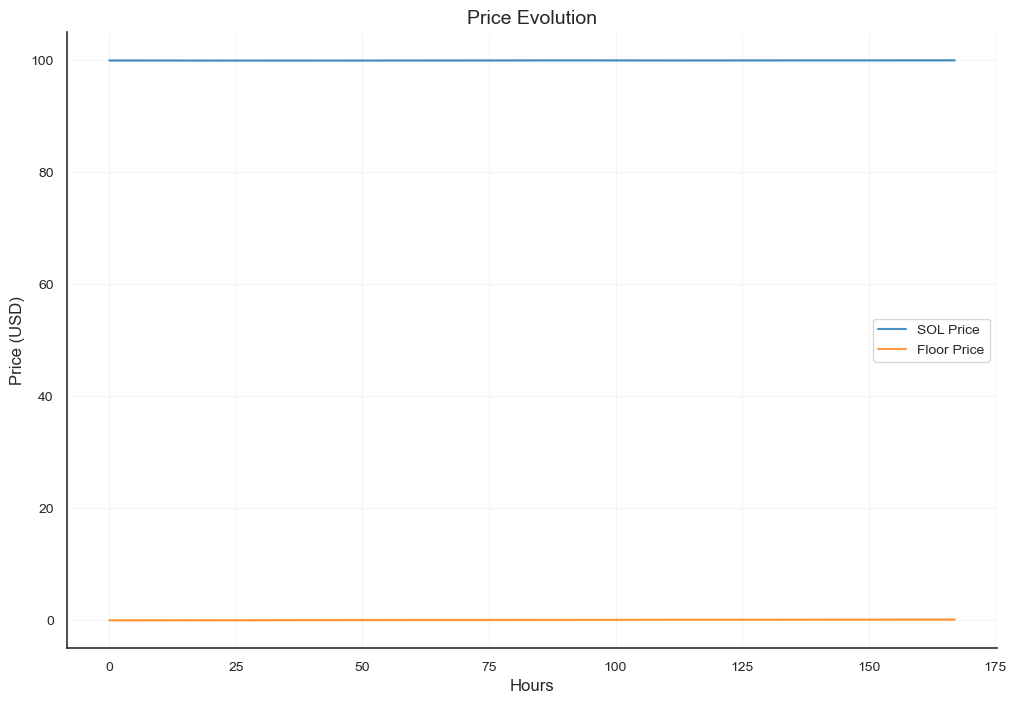

Creating volume analysis...


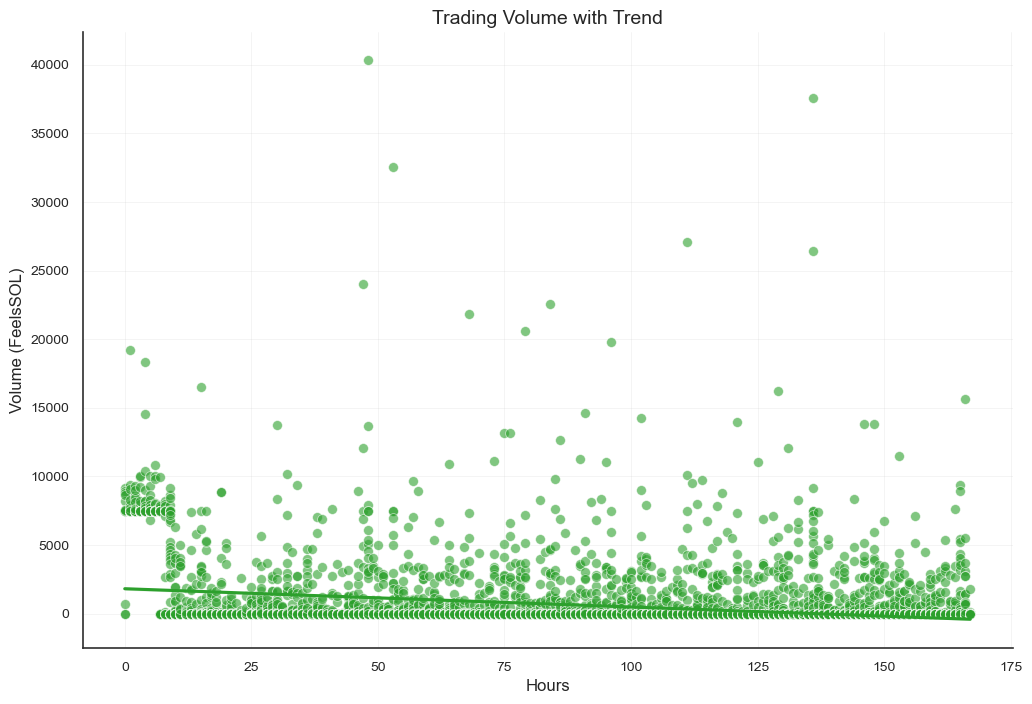

Creating hourly analysis...


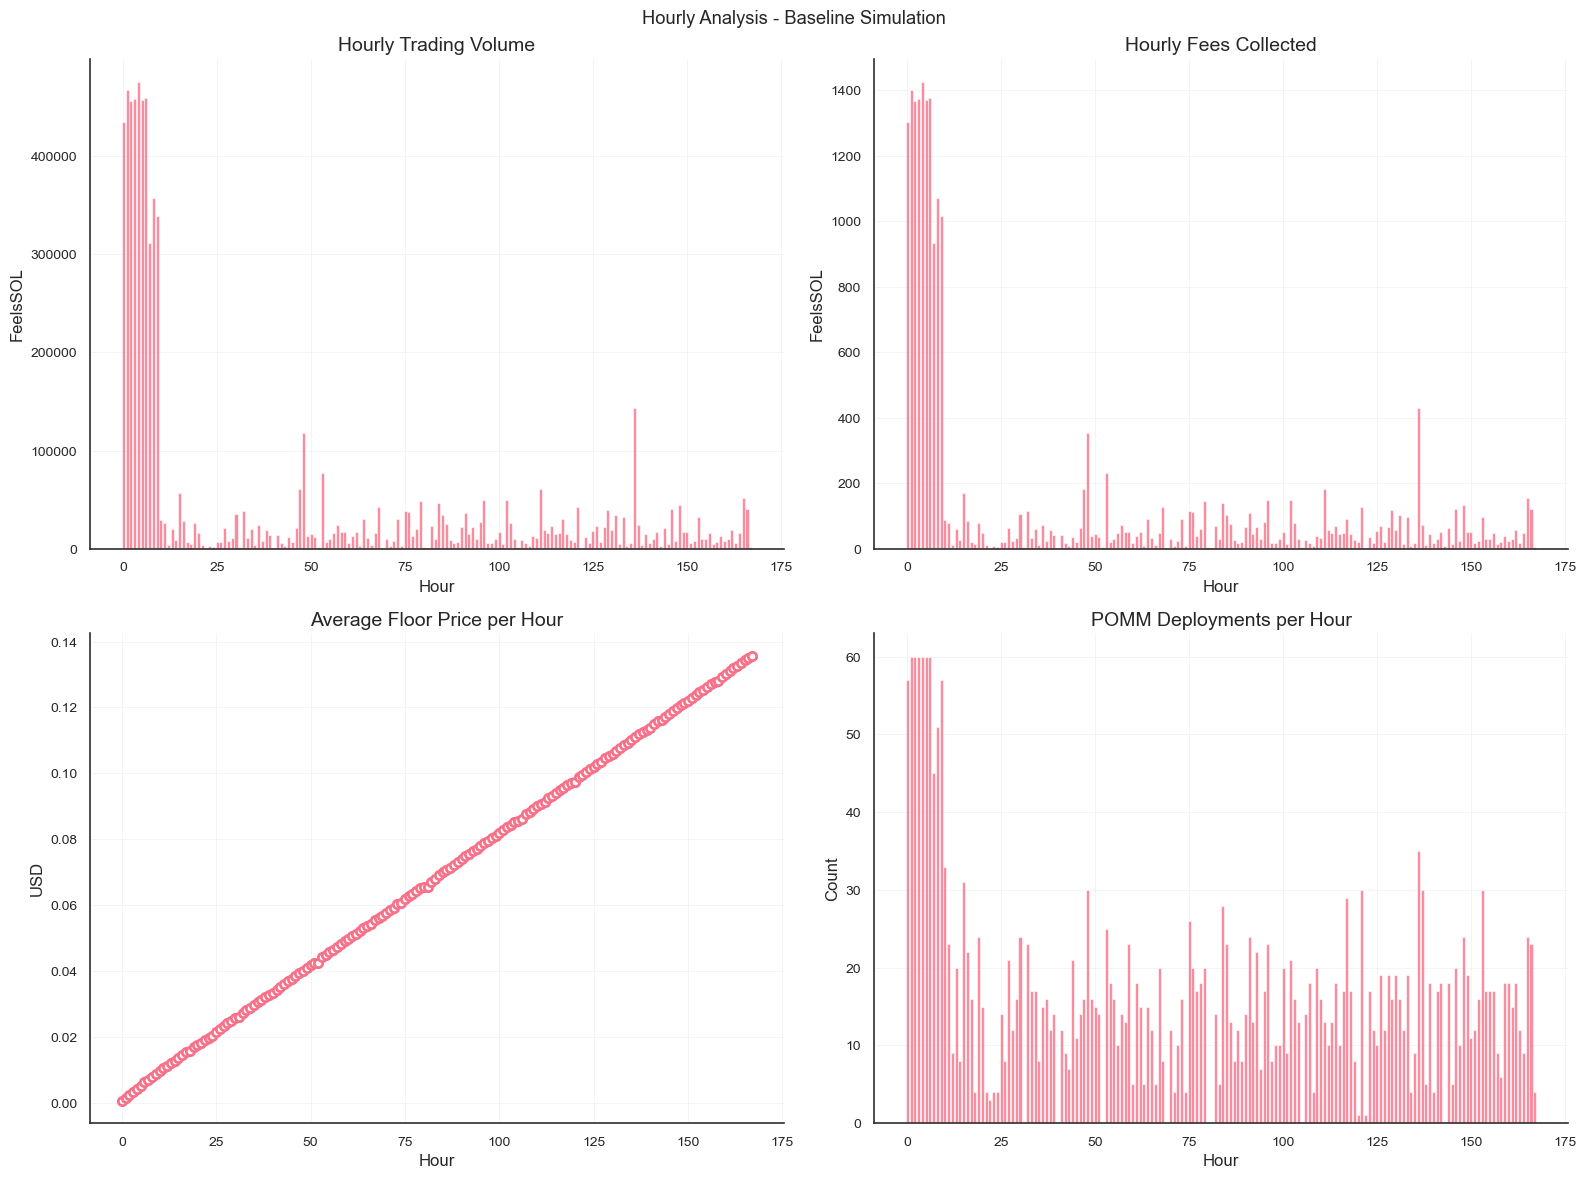

In [5]:
# Create additional analysis plots using centralized functions
df = snapshots_to_dataframe(baseline_results.snapshots)

if not df.is_empty():
    # Price evolution plot
    print("Creating price evolution analysis...")
    fig, ax = plot_price_evolution(df.to_pandas())
    if fig:
        plt.show()
    
    # Volume analysis plot  
    print("Creating volume analysis...")
    fig, ax = plot_volume_analysis(df.to_pandas())
    if fig:
        plt.show()
        
    # Custom hourly analysis with centralized styling
    print("Creating hourly analysis...")
    hourly_data = calculate_hourly_aggregates(baseline_results.snapshots)
    
    if hourly_data:
        fig, axes = create_figure_with_style(2, 2, DEFAULT_STYLE.figure_size_detailed)
        if fig:
            # Extract data for plotting
            hours = list(range(len(hourly_data)))
            volumes = [h['volume_feelssol'] for h in hourly_data]
            fees = [h['fees_collected'] for h in hourly_data]
            floor_prices = [h['avg_floor_price'] for h in hourly_data]
            deployments = [h['pomm_deployments'] for h in hourly_data]
            
            # Hourly volume
            axes[0, 0].bar(hours, volumes, alpha=DEFAULT_STYLE.alpha, 
                          edgecolor=DEFAULT_STYLE.edgecolor, linewidth=0.5)
            axes[0, 0].set_title('Hourly Trading Volume')
            axes[0, 0].set_ylabel('FeelsSOL')
            axes[0, 0].set_xlabel('Hour')
            
            # Hourly fees
            axes[0, 1].bar(hours, fees, alpha=DEFAULT_STYLE.alpha,
                          edgecolor=DEFAULT_STYLE.edgecolor, linewidth=0.5)
            axes[0, 1].set_title('Hourly Fees Collected')
            axes[0, 1].set_ylabel('FeelsSOL')
            axes[0, 1].set_xlabel('Hour')
            
            # Floor price trend
            axes[1, 0].plot(hours, floor_prices, marker='o', linewidth=DEFAULT_STYLE.linewidth,
                           markersize=6, markerfacecolor='white', 
                           markeredgewidth=DEFAULT_STYLE.marker_edgewidth)
            axes[1, 0].set_title('Average Floor Price per Hour')
            axes[1, 0].set_ylabel('USD')
            axes[1, 0].set_xlabel('Hour')
            
            # POMM deployment frequency
            axes[1, 1].bar(hours, deployments, alpha=DEFAULT_STYLE.alpha,
                          edgecolor=DEFAULT_STYLE.edgecolor, linewidth=0.5)
            axes[1, 1].set_title('POMM Deployments per Hour')
            axes[1, 1].set_ylabel('Count')
            axes[1, 1].set_xlabel('Hour')
            
            plt.suptitle('Hourly Analysis - Baseline Simulation')
            plt.tight_layout()
            plt.show()
else:
    print("No data available for plotting")

## 3. Statistical Analysis of Key Metrics

In [6]:
# Floor/market ratio statistics
ratio_stats = calculate_floor_to_market_ratio_stats(baseline_results.snapshots)

print("=== FLOOR/MARKET RATIO STATISTICS ===")
for stat, value in ratio_stats.items():
    print(f"{stat}: {value:.4f}")

=== FLOOR/MARKET RATIO STATISTICS ===
mean_floor_ratio: 0.0007
median_floor_ratio: 0.0007
std_floor_ratio: 0.0004
min_floor_ratio: 0.0000
max_floor_ratio: 0.0014
p25_floor_ratio: 0.0003
p75_floor_ratio: 0.0010


In [7]:
# POMM efficiency metrics
pomm_metrics = calculate_pomm_efficiency_metrics(baseline_results.snapshots)

print("=== POMM DEPLOYMENT EFFICIENCY ===")
for metric, value in pomm_metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.2f}")
    else:
        print(f"{metric}: {value}")

=== POMM DEPLOYMENT EFFICIENCY ===
pomm_count: 2801
avg_deployment_size: 0
median_deployment_size: 0
deployment_frequency: 16.67
total_deployed_amount: 0


## 4. Fee Distribution Analysis

In [8]:
# Analyze fee distribution patterns
total_fees = baseline_analysis['total_fees']
treasury_fees = baseline_analysis['final_treasury_balance']
buffer_fees = baseline_analysis['buffer_routed_cumulative']

# Calculate creator fees from final state
creator_fees = baseline_results.snapshots[-1].floor_state.creator_balance

print("=== FEE DISTRIBUTION ANALYSIS ===")
print(f"Total Fees Collected: {total_fees:,.2f} FeelsSOL")
print(f"")
print(f"Buffer Allocation: {buffer_fees:,.2f} FeelsSOL ({buffer_fees/total_fees*100:.1f}%)")
print(f"Treasury Allocation: {treasury_fees:,.2f} FeelsSOL ({treasury_fees/total_fees*100:.1f}%)")
print(f"Creator Allocation: {creator_fees:,.2f} FeelsSOL ({creator_fees/total_fees*100:.1f}%)")
print(f"")
print(f"Expected vs Actual Distribution:")
# Calculate expected percentages from basis points
buffer_share_pct = 100.0 - (config.protocol_fee_rate_bps + config.creator_fee_rate_bps) / 100.0
treasury_share_pct = config.protocol_fee_rate_bps / 100.0
creator_share_pct = config.creator_fee_rate_bps / 100.0

print(f"Buffer: Expected {buffer_share_pct:.1f}%, Actual {buffer_fees/total_fees*100:.1f}%")
print(f"Treasury: Expected {treasury_share_pct:.1f}%, Actual {treasury_fees/total_fees*100:.1f}%")
print(f"Creator: Expected {creator_share_pct:.1f}%, Actual {creator_fees/total_fees*100:.1f}%")

=== FEE DISTRIBUTION ANALYSIS ===
Total Fees Collected: 21,372.73 FeelsSOL

Buffer Allocation: 21,052.13 FeelsSOL (98.5%)
Treasury Allocation: 213.73 FeelsSOL (1.0%)
Creator Allocation: 106.86 FeelsSOL (0.5%)

Expected vs Actual Distribution:
Buffer: Expected 98.5%, Actual 98.5%
Treasury: Expected 1.0%, Actual 1.0%
Creator: Expected 0.5%, Actual 0.5%


## 5. Scenario Comparison Analysis

In [9]:
# Compare different fee scenarios
scenarios = [
    ("default", "Current Default"),
    ("protocol_sustainable", "Protocol Sustainable"), 
    ("creator_incentive", "Creator Incentive"),
    ("balanced_growth", "Balanced Growth")
]

scenario_results = {}

print("Running scenario comparison analysis...")

for scenario_key, scenario_name in scenarios:
    print(f"Running {scenario_name}...")
    
    config = SimulationConfig.create_fee_scenario(scenario_key)
    sim = FeelsSimulation(config)
    results = sim.run(hours=168)
    analysis = calculate_key_metrics(results.snapshots)
    
    # Calculate fee percentages from basis points
    buffer_pct = 100.0 - (config.protocol_fee_rate_bps + config.creator_fee_rate_bps) / 100.0
    treasury_pct = config.protocol_fee_rate_bps / 100.0
    creator_pct = config.creator_fee_rate_bps / 100.0
    
    scenario_results[scenario_key] = {
        "name": scenario_name,
        "config": {
            "buffer": buffer_pct,
            "treasury": treasury_pct,
            "creator": creator_pct,
            "protocol_fee_rate_bps": config.protocol_fee_rate_bps,
            "creator_fee_rate_bps": config.creator_fee_rate_bps
        },
        "analysis": analysis
    }
    
    print(f"  Floor growth: {analysis['floor_growth_rate_annual']:.2%}, "
          f"POMM deployments: {analysis['pomm_deployments']}, "
          f"Treasury: {analysis['final_treasury_balance']:.1f}")

print("Scenario comparison completed")

Running scenario comparison analysis...
Running Current Default...


  Floor growth: 140095.16%, POMM deployments: 4169, Treasury: 621.1
Running Protocol Sustainable...


  Floor growth: 152381.28%, POMM deployments: 8478, Treasury: 2797.9
Running Creator Incentive...


  Floor growth: 156673.22%, POMM deployments: 10053, Treasury: 2323.4
Running Balanced Growth...


  Floor growth: 156912.47%, POMM deployments: 10048, Treasury: 2899.4
Scenario comparison completed


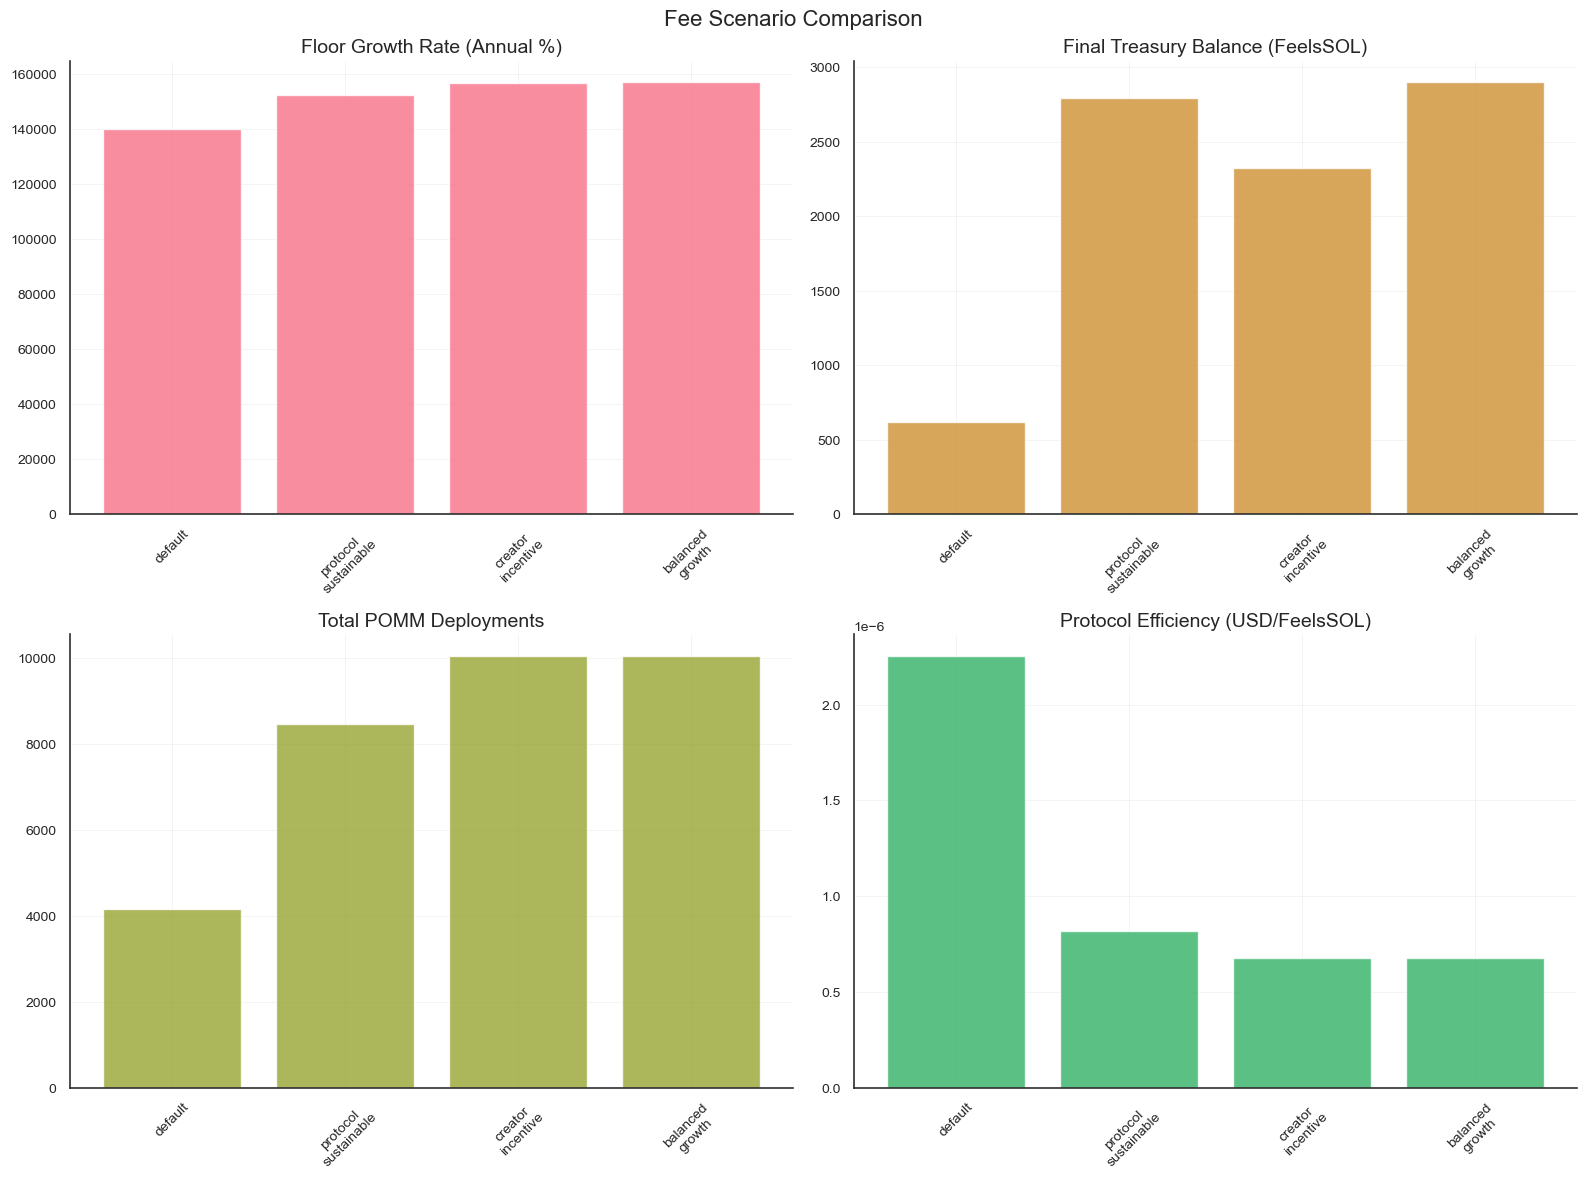

In [10]:
# Create comparative visualization using centralized styling
fig, axes = create_figure_with_style(2, 2, DEFAULT_STYLE.figure_size_detailed)
if fig:
    fig.suptitle('Fee Scenario Comparison', fontsize=16)

    scenarios_list = list(scenario_results.keys())
    scenario_names = [scenario_results[s]["name"] for s in scenarios_list]
    colors = DEFAULT_STYLE.color_palette

    # Floor growth rates
    floor_growth = [scenario_results[s]["analysis"]["floor_growth_rate_annual"] for s in scenarios_list]
    axes[0, 0].bar(range(len(scenarios_list)), [x*100 for x in floor_growth], 
                   color=colors[0], alpha=DEFAULT_STYLE.alpha, 
                   edgecolor=DEFAULT_STYLE.edgecolor, linewidth=1)
    axes[0, 0].set_title('Floor Growth Rate (Annual %)')
    axes[0, 0].set_xticks(range(len(scenarios_list)))
    axes[0, 0].set_xticklabels([s.replace('_', '\n') for s in scenarios_list], rotation=45)

    # Treasury balances
    treasury_balances = [scenario_results[s]["analysis"]["final_treasury_balance"] for s in scenarios_list]
    axes[0, 1].bar(range(len(scenarios_list)), treasury_balances,
                   color=colors[1], alpha=DEFAULT_STYLE.alpha,
                   edgecolor=DEFAULT_STYLE.edgecolor, linewidth=1)
    axes[0, 1].set_title('Final Treasury Balance (FeelsSOL)')
    axes[0, 1].set_xticks(range(len(scenarios_list)))
    axes[0, 1].set_xticklabels([s.replace('_', '\n') for s in scenarios_list], rotation=45)

    # POMM deployments
    pomm_deployments = [scenario_results[s]["analysis"]["pomm_deployments"] for s in scenarios_list]
    axes[1, 0].bar(range(len(scenarios_list)), pomm_deployments,
                   color=colors[2], alpha=DEFAULT_STYLE.alpha,
                   edgecolor=DEFAULT_STYLE.edgecolor, linewidth=1)
    axes[1, 0].set_title('Total POMM Deployments')
    axes[1, 0].set_xticks(range(len(scenarios_list)))
    axes[1, 0].set_xticklabels([s.replace('_', '\n') for s in scenarios_list], rotation=45)

    # Protocol efficiency
    efficiency = [scenario_results[s]["analysis"]["protocol_efficiency"] for s in scenarios_list]
    axes[1, 1].bar(range(len(scenarios_list)), efficiency,
                   color=colors[3], alpha=DEFAULT_STYLE.alpha,
                   edgecolor=DEFAULT_STYLE.edgecolor, linewidth=1)
    axes[1, 1].set_title('Protocol Efficiency (USD/FeelsSOL)')
    axes[1, 1].set_xticks(range(len(scenarios_list)))
    axes[1, 1].set_xticklabels([s.replace('_', '\n') for s in scenarios_list], rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("Could not create comparison plots")

## 6. Key Insights and Recommendations

In [11]:
# Generate key insights
print("=== KEY INSIGHTS FROM BASELINE ANALYSIS ===")
print()

# Best performing scenario analysis
best_floor_growth = max(scenario_results.items(), key=lambda x: x[1]["analysis"]["floor_growth_rate_annual"])
best_treasury = max(scenario_results.items(), key=lambda x: x[1]["analysis"]["final_treasury_balance"])
best_efficiency = max(scenario_results.items(), key=lambda x: x[1]["analysis"]["protocol_efficiency"])

print(f"1. Floor Growth Performance:")
print(f"   Best: {best_floor_growth[1]['name']} ({best_floor_growth[1]['analysis']['floor_growth_rate_annual']:.2%} annual)")
print(f"   Current default achieves {baseline_analysis['floor_growth_rate_annual']:.2%} annual growth")
print()

print(f"2. Treasury Accumulation:")
print(f"   Best: {best_treasury[1]['name']} ({best_treasury[1]['analysis']['final_treasury_balance']:.1f} FeelsSOL)")
print(f"   Current default accumulates {baseline_analysis['final_treasury_balance']:.1f} FeelsSOL")
print()

print(f"3. Protocol Efficiency:")
print(f"   Best: {best_efficiency[1]['name']} ({best_efficiency[1]['analysis']['protocol_efficiency']:.6f} USD/FeelsSOL)")
print(f"   Current default achieves {baseline_analysis['protocol_efficiency']:.6f} USD/FeelsSOL efficiency")
print()

print(f"4. Trade-offs Analysis:")
current_config = scenario_results['default']['config']
sustainable_config = scenario_results['protocol_sustainable']['config']

treasury_diff = best_treasury[1]['analysis']['final_treasury_balance'] - baseline_analysis['final_treasury_balance']
floor_diff = best_floor_growth[1]['analysis']['floor_growth_rate_annual'] - baseline_analysis['floor_growth_rate_annual']

print(f"   Moving from current default to protocol sustainable:")
print(f"   - Treasury gains: +{treasury_diff:.1f} FeelsSOL")
print(f"   - Floor growth change: {floor_diff:+.2%}")
print(f"   - Buffer allocation change: {sustainable_config['buffer'] - current_config['buffer']:+.1f}%")
print()

print(f"5. POMM Deployment Patterns:")
print(f"   Baseline deployments: {baseline_analysis['pomm_deployments']} over {baseline_analysis['simulation_hours']:.0f} hours")
print(f"   Deployment frequency: {baseline_analysis['pomm_deployments'] / baseline_analysis['simulation_hours'] * 24:.1f} per day")
if baseline_analysis['pomm_deployments'] > 0:
    print(f"   Average deployment drives floor up by: {(baseline_analysis['final_floor_price'] - baseline_analysis['initial_floor_price']) / baseline_analysis['pomm_deployments']:.8f} USD")

=== KEY INSIGHTS FROM BASELINE ANALYSIS ===

1. Floor Growth Performance:
   Best: Balanced Growth (156912.47% annual)
   Current default achieves 135724.99% annual growth

2. Treasury Accumulation:
   Best: Balanced Growth (2899.4 FeelsSOL)
   Current default accumulates 213.7 FeelsSOL

3. Protocol Efficiency:
   Best: Current Default (0.000002 USD/FeelsSOL)
   Current default achieves 0.000006 USD/FeelsSOL efficiency

4. Trade-offs Analysis:
   Moving from current default to protocol sustainable:
   - Treasury gains: +2685.7 FeelsSOL
   - Floor growth change: +21187.49%
   - Buffer allocation change: -0.5%

5. POMM Deployment Patterns:
   Baseline deployments: 2801 over 168 hours
   Deployment frequency: 400.1 per day
   Average deployment drives floor up by: 0.00004846 USD


## 7. Export Results for Further Analysis

In [12]:
# Export results for use in parameter sweep notebook
baseline_export = {
    "timestamp": datetime.now().isoformat(),
    "baseline_config": {
        "protocol_fee_rate_bps": config.protocol_fee_rate_bps,
        "creator_fee_rate_bps": config.creator_fee_rate_bps,
        "base_fee_bps": config.base_fee_bps,
    },
    "baseline_analysis": baseline_analysis,
    "scenario_comparison": scenario_results,
    "ratio_statistics": ratio_stats,
    "pomm_metrics": pomm_metrics
}

# Setup export path for both local and online execution
try:
    # Try to use project_root if it was set in the import section
    export_dir = project_root / "experiments" / "runs"
except NameError:
    # If running from installed package, use current directory
    export_dir = Path("experiments") / "runs"

export_dir.mkdir(parents=True, exist_ok=True)
export_path = export_dir / "baseline_analysis.json"

with open(export_path, 'w') as f:
    json.dump(baseline_export, f, indent=2)

print(f"Baseline analysis results exported to {export_path}")
print("Use this data in parameter sweep analysis (02_parameter_sweep.ipynb)")

Baseline analysis results exported to /Users/hxrts/projects/timewave/feels-floor-sim/experiments/runs/baseline_analysis.json
Use this data in parameter sweep analysis (02_parameter_sweep.ipynb)


## Summary

This baseline analysis provides:

1. **Reference Performance Metrics** - Current protocol defaults performance baseline
2. **Fee Distribution Validation** - Confirms actual vs expected fee routing
3. **POMM Deployment Patterns** - Understanding of floor advancement dynamics
4. **Scenario Comparison** - Initial insights into parameter sensitivity
5. **Trade-off Analysis** - Foundation for parameter optimization decisions

**Next Steps:**
- Use `just sweep` to run comprehensive parameter sweeps
- Analyze results in `02_parameter_sweep.ipynb`
- Generate governance recommendations based on findings

**Key Finding:** The current defaults (98.5/1/0.5) prioritize floor advancement over protocol treasury accumulation. Alternative scenarios show the trade-offs available for optimization.